In [1]:
import scipy
import matplotlib
import pandas
import numpy
import cartopy

In [2]:
# Login app for EarthData
# source of code: https://github.com/SciTools/cartopy/issues/789
from http.cookiejar import CookieJar
from urllib.parse import urlencode
import urllib.request
import getpass

# The user credentials that will be used to authenticate access to the data
username = input("Masukkan username: ")
passwd = getpass.getpass("Masukkan password: ")

# The url of the file we wish to retrieve

url = "http://e4ftl01.cr.usgs.gov/"

# Create a password manager to deal with the 401 reponse that is returned from
# Earthdata Login

password_manager = urllib.request.HTTPPasswordMgrWithDefaultRealm()
password_manager.add_password(None, "https://urs.earthdata.nasa.gov", username, passwd)

# Create a cookie jar for storing cookies. This is used to store and return
# the session cookie given to use by the data server (otherwise it will just
# keep sending us back to Earthdata Login to authenticate).  Ideally, we
# should use a file based cookie jar to preserve cookies between runs. This
# will make it much more efficient.

cookie_jar = CookieJar()

# Install all the handlers.

opener = urllib.request.build_opener(
    urllib.request.HTTPBasicAuthHandler(password_manager),
    #urllib2.HTTPHandler(debuglevel=1),    # Uncomment these two lines to see
    #urllib2.HTTPSHandler(debuglevel=1),   # details of the requests/responses
    urllib.request.HTTPCookieProcessor(cookie_jar))
urllib.request.install_opener(opener)

# Create and submit the request. There are a wide range of exceptions that
# can be thrown here, including HTTPError and URLError. These should be
# caught and handled.

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)

# Print out the result (not a good idea with binary data!)

body = response.read()

Masukkan username: shafahadaina01
Masukkan password: ········


C:\Users\VivoBook\miniconda3\envs\envgscope\lib\site-packages\cartopy\mpl\gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\VivoBook\miniconda3\envs\envgscope\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\VivoBook\miniconda3\envs\envgscope\lib\site-packages\cartopy\io\srtm.py:426: UserWarning: SRTM requires an account set up and log in to access. Use of this Downloader is likely to fail with HTTP 401 errors.
  warnings.warn('SRTM requires an account set up and log in to access. '
C:\Users\VivoBook\miniconda3\envs\envgscope\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne

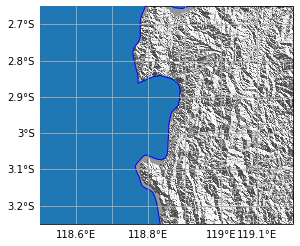

In [3]:
"""
Dimodifikasi dari: https://scitools.org.uk/cartopy/docs/v0.14/examples/srtm_shading.html
This example illustrates the automatic download of STRM data, and adding of
shading to create a so-called "Shaded Relief SRTM".
Originally contributed by Thomas Lecocq (http://geophysique.be).
"""
import numpy as np
import cartopy.crs as ccrs
from cartopy.io import srtm
import matplotlib.pyplot as plt

from cartopy.io import PostprocessedRasterSource, LocatedImage
from cartopy.io.srtm import SRTM3Source
import cartopy.feature as cfeature

def shade(located_elevations):
    """
    Fungsi untuk memberikan hillshade pada data DEM
    """
    new_img = srtm.add_shading(located_elevations.image,
                               azimuth=135, altitude=15)
    return LocatedImage(new_img, located_elevations.extent)


Source=SRTM3Source
name='SRTM3'
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())

# Add ocean from NE
OCEAN = cfeature.NaturalEarthFeature(
        category='physical',
        name='ocean',
        scale='10m')
ax.add_feature(OCEAN, edgecolor='blue', zorder=10)

# Define a raster source which uses the SRTM data and applies the
# shade function when the data is retrieved.
shaded_srtm = PostprocessedRasterSource(Source(), shade)

# Add the shaded SRTM source to our map with a grayscale colormap.
ax.add_raster(shaded_srtm, cmap='Greys', alpha=.75)

# This data is high resolution, so pick a small area which has some
# interesting orography.
ax.set_extent([118.5, 119.2, -3.25, -2.65])
ax.set_xlabel("Longitude [deg]")
ax.set_ylabel("Latitude [deg]")

gl = ax.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False, zorder=11)

gl.xlabels_top = False
gl.ylabels_right = False

In [5]:
import pandas as pd

In [6]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[ForwardRef('PathLike[str]'), str, IO[~T], io.RawIOBase, io.BufferedIOBase, io.TextIOBase, _io.TextIOWrapper, mmap.mmap], sep=<object object at 0x000001BE2E5769D0>, delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_

In [20]:
data = pd.read_csv("Geoscope/geoscope-geohazard-workshop-main/data/demo_data_BMKG_Mamuju.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Geoscope/geoscope-geohazard-workshop-main/data/demo_data_BMKG_Mamuju.csv'